In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-video-games-19952021-metacritic/all_games.csv


# Importing Dependencies

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Load Dataset

In [3]:
df = pd.read_csv('/kaggle/input/top-video-games-19952021-metacritic/all_games.csv')

# Exploring Data

In [4]:
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [5]:
df.isnull().sum()

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64

In [6]:
df.shape

(18800, 6)

In [7]:
df['summary'].fillna('Missing', inplace=True)

In [8]:
df.isnull().sum()

name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64

In [9]:
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [10]:
df['platform'].value_counts()

 PC                  4864
 PlayStation 4       2056
 Xbox 360            1644
 PlayStation 2       1414
 Switch              1399
 PlayStation 3       1256
 Xbox One            1179
 Xbox                 789
 DS                   720
 Wii                  655
 PSP                  512
 GameCube             448
 Game Boy Advance     438
 3DS                  396
 PlayStation Vita     257
 PlayStation          187
 Wii U                184
 Dreamcast            125
 PlayStation 5        124
 Xbox Series X         77
 Nintendo 64           71
 Stadia                 5
Name: platform, dtype: int64

# Data Cleaning

In [11]:
df[df['user_review']=='tbd']

,name,platform,release_date,summary,meta_score,user_review
679,Synth Riders,PlayStation 4,"August 10, 2021",Synth Riders is your freestyle dancing VR rhyt...,89,tbd
963,Tiger Woods PGA Tour 2005,GameCube,"September 20, 2004",Challenge professional golfer Tiger Woods to c...,88,tbd
1277,NASCAR 2005: Chase for the Cup,Xbox,"August 31, 2004",Do you have what it takes to be a top NASCAR d...,86,tbd
1472,Moto Racer Advance,Game Boy Advance,"December 5, 2002",Missing,86,tbd
2098,Mushihimesama,Switch,"June 15, 2021",Mushihimesama (Bug Princess in English) is a v...,84,tbd
...,...,...,...,...,...,...
18594,Air Conflicts: Aces of World War II,PSP,"April 14, 2009",Air Conflicts is an arcade flight simulator ga...,36,tbd
18639,King of Clubs,Wii,"August 4, 2008","Never the same game twice, this absorbing and ...",35,tbd
18700,Jenga World Tour,DS,"November 13, 2007",Jenga is based on the world famous wooden bloc...,32,tbd
18715,Dream Chronicles,PlayStation 3,"November 23, 2010",Unlock the secrets of the beautiful and myster...,31,tbd


In [12]:
df = df.drop(df[df['user_review'] == 'tbd'].index)

In [13]:
count_platform = df["platform"].value_counts().reset_index()
count_platform.columns = ["Platform", "Count"]
count_platform

,Platform,Count
0,PC,4660
1,PlayStation 4,1950
2,Xbox 360,1547
3,PlayStation 2,1311
4,Switch,1216
5,PlayStation 3,1208
6,Xbox One,1089
7,Xbox,686
8,DS,599
9,Wii,597


# Count by platform

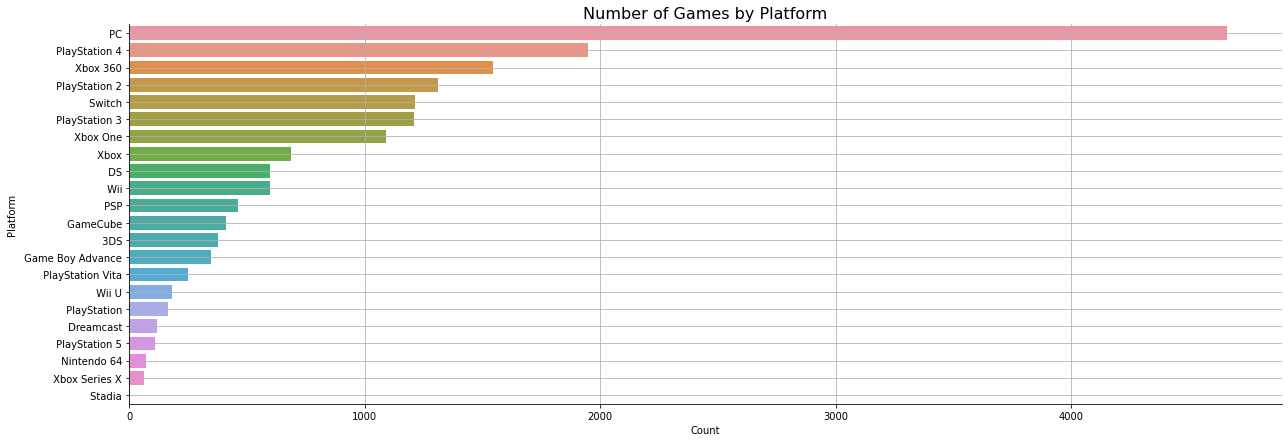

In [14]:
sns.catplot(x="Count", y="Platform", kind="bar", data=count_platform, height=6, aspect=3)
plt.title('Number of Games by Platform',fontsize=16)

plt.grid(True)

# Top 10 Games by User Review

In [15]:
df['user_review'] = df['user_review'].astype(np.float)

In [16]:
top_user_score = df.sort_values(['user_review'], ascending=False)[:10]
top_user_score[['name','user_review']]

,name,user_review
3504,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,9.7
2450,Ghost Trick: Phantom Detective,9.7
4953,Rochard,9.7
14836,Metal Torrent,9.7
9550,After Burner Climax,9.7
4844,GrimGrimoire,9.7
10936,Tengami,9.7
12434,Crystar,9.6
4573,Superliminal,9.6
7638,Superliminal,9.6


Text(0, 0.5, 'Name')

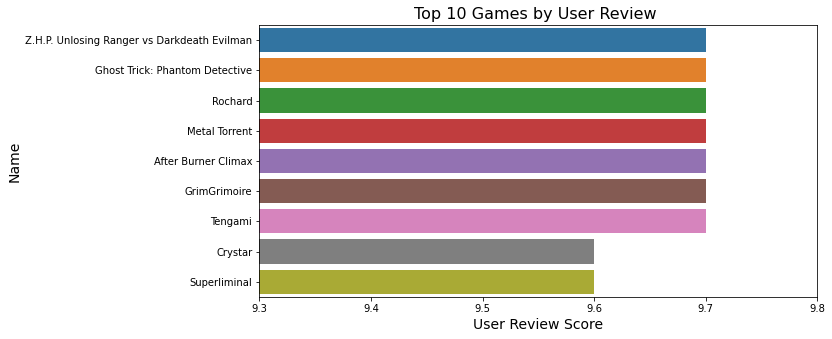

In [17]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = top_user_score['user_review'], y = top_user_score['name'])
plt.xlim(9.3,9.8)
plt.title('Top 10 Games by User Review ', fontsize = 16)
plt.xlabel('User Review Score', fontsize = 14)
plt.ylabel('Name', fontsize = 14)

# Top 10 Games by Meta Score

In [18]:
top_meta_score = df.sort_values(['meta_score'], ascending = False)[:10]
top_meta_score[['name','meta_score']]

,name,meta_score
0,The Legend of Zelda: Ocarina of Time,99
2,Grand Theft Auto IV,98
3,SoulCalibur,98
4,Grand Theft Auto IV,98
1,Tony Hawk's Pro Skater 2,98
14,Tony Hawk's Pro Skater 3,97
23,NFL 2K1,97
22,The House in Fata Morgana - Dreams of the Reve...,97
21,Halo: Combat Evolved,97
20,Super Mario Odyssey,97


Text(0, 0.5, 'Name')

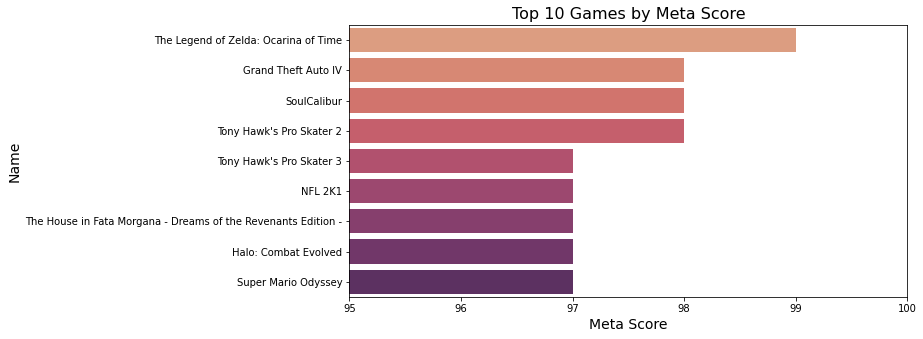

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=top_meta_score['meta_score'], y=top_meta_score['name'], orient = 'h', palette='flare')
plt.xlim(95,100)
plt.title('Top 10 Games by Meta Score', fontsize=16)
plt.xlabel('Meta Score', fontsize=14)
plt.ylabel('Name', fontsize=14)

#  Era that had the best video games

In [20]:
era = df
era['release_date'] = pd.to_datetime(era['release_date'])

In [21]:
era['year'] = df['release_date'].dt.year

In [22]:
era1 =era.groupby('year')

In [23]:
era2 = df.sort_values(['meta_score'], ascending = False)
era2[['year','meta_score']]

,year,meta_score
0,1998,99
2,2008,98
3,1999,98
4,2008,98
1,2000,98
...,...,...
18795,2013,22
18796,2003,22
18797,2015,21
18798,2012,20


In [24]:
era2 =era.groupby('year')

In [25]:
era2.head()

,name,platform,release_date,summary,meta_score,user_review,year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,As most major publishers' development efforts ...,98,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,2008
3,SoulCalibur,Dreamcast,1999-09-08,"This is a tale of souls and swords, transcendi...",98,8.4,1999
4,Grand Theft Auto IV,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,2008
...,...,...,...,...,...,...,...
267,The Witcher 3: Wild Hunt - Blood and Wine,PC,2016-05-30,This expansion pack is an old-school add on wi...,92,9.3,2016
276,Dark Souls II,Xbox 360,2014-03-11,Prepare to die... Again. Dare yourself to enga...,91,7.9,2014
289,Overwatch,PC,2016-05-23,Overwatch is a highly stylized team-based shoo...,91,6.5,2016
308,Dragon Quest XI S: Echoes of an Elusive Age - ...,Switch,2019-09-27,Dragon Quest XI: Echoes of an Elusive Age tell...,91,8.9,2019


In [26]:
era2['meta_score'].sum().sort_values(ascending = False).reset_index()

,year,meta_score
0,2018,78960
1,2017,72380
2,2019,71288
3,2020,69924
4,2016,67667
5,2015,60403
6,2009,60348
7,2008,57499
8,2011,57460
9,2007,57244


In [27]:
era3 = era2['meta_score'].sum().sort_values(ascending = False).reset_index()
era3.columns = ["year", "Total"] 


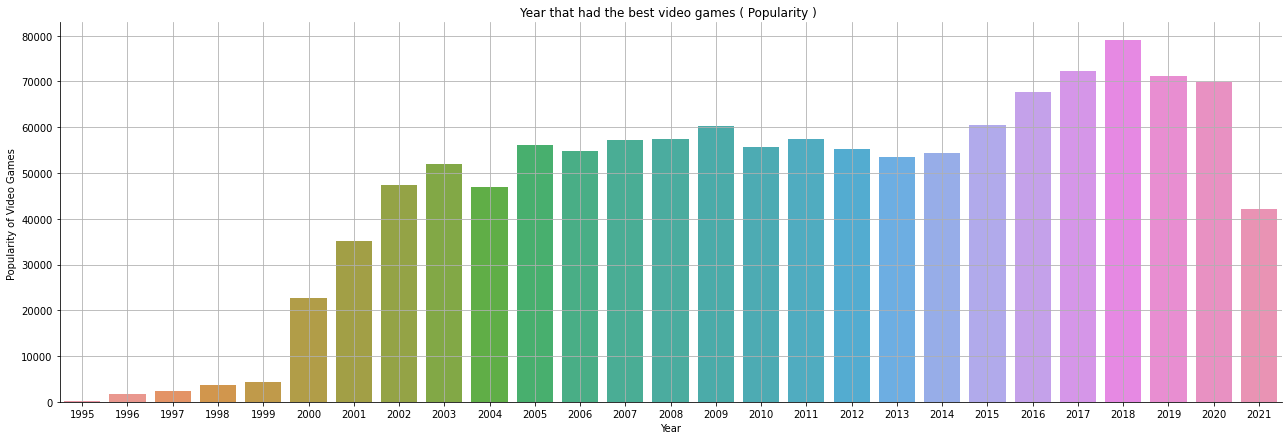

In [28]:
sns.catplot(x="year", y="Total", kind="bar", data=era3, height=6, aspect=3)
plt.title("Year that had the best video games ( Popularity ) ")
plt.xlabel('Year')
plt.ylabel("Popularity of Video Games ")
plt.grid(True)

# Thank You !!
  Please  UPVOTE  if Like my work !!  